In [1]:
# !pip install opencv-python transformers accelerate
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
from diffusers.utils import load_image
import numpy as np
import torch

import cv2
from PIL import Image

# download an image
image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)
np_image = np.array(image)

# get canny image
np_image = cv2.Canny(np_image, 100, 200)
np_image = np_image[:, :, None]
np_image = np.concatenate([np_image, np_image, np_image], axis=2)
canny_image = Image.fromarray(np_image)


In [2]:
# load control net and stable diffusion v1-5
controlnet = ControlNetModel.from_pretrained("./albedo_control/controlnet_3/", torch_dtype=torch.float16)

In [3]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)

unet\diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/20 [00:00<?, ?it/s]

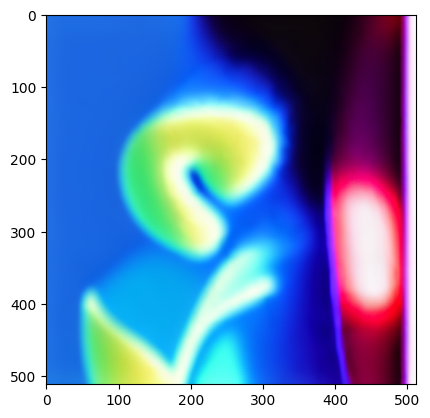

In [4]:




# speed up diffusion process with faster scheduler and memory optimization
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

# generate image
generator = torch.manual_seed(0)
image = pipe(
    "futuristic-looking woman",
    num_inference_steps=20,
    generator=generator,
    image=canny_image,
).images[0]

#plot the image
import matplotlib.pyplot as plt
plt.imshow(image)

  0%|          | 0/60 [00:00<?, ?it/s]

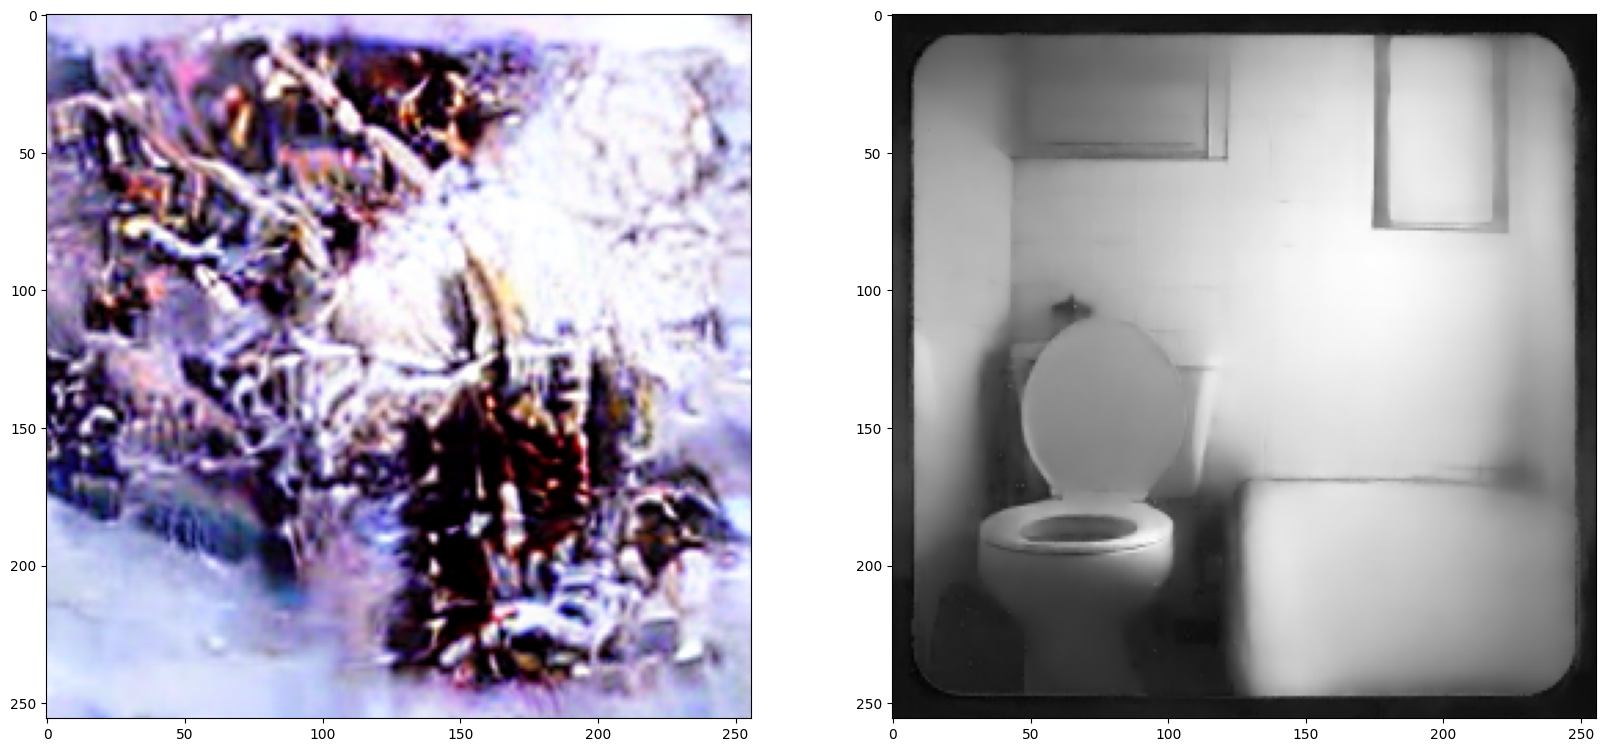

In [5]:
img1 = load_image('./images/000000053820_pred_shd.png')

image = pipe(
    "",
    num_inference_steps=60,
    generator=generator,
    image=img1,
).images[0]

#plot the image
import matplotlib.pyplot as plt
#draw the image and img1
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(img1)
plt.show()


  0%|          | 0/40 [00:00<?, ?it/s]

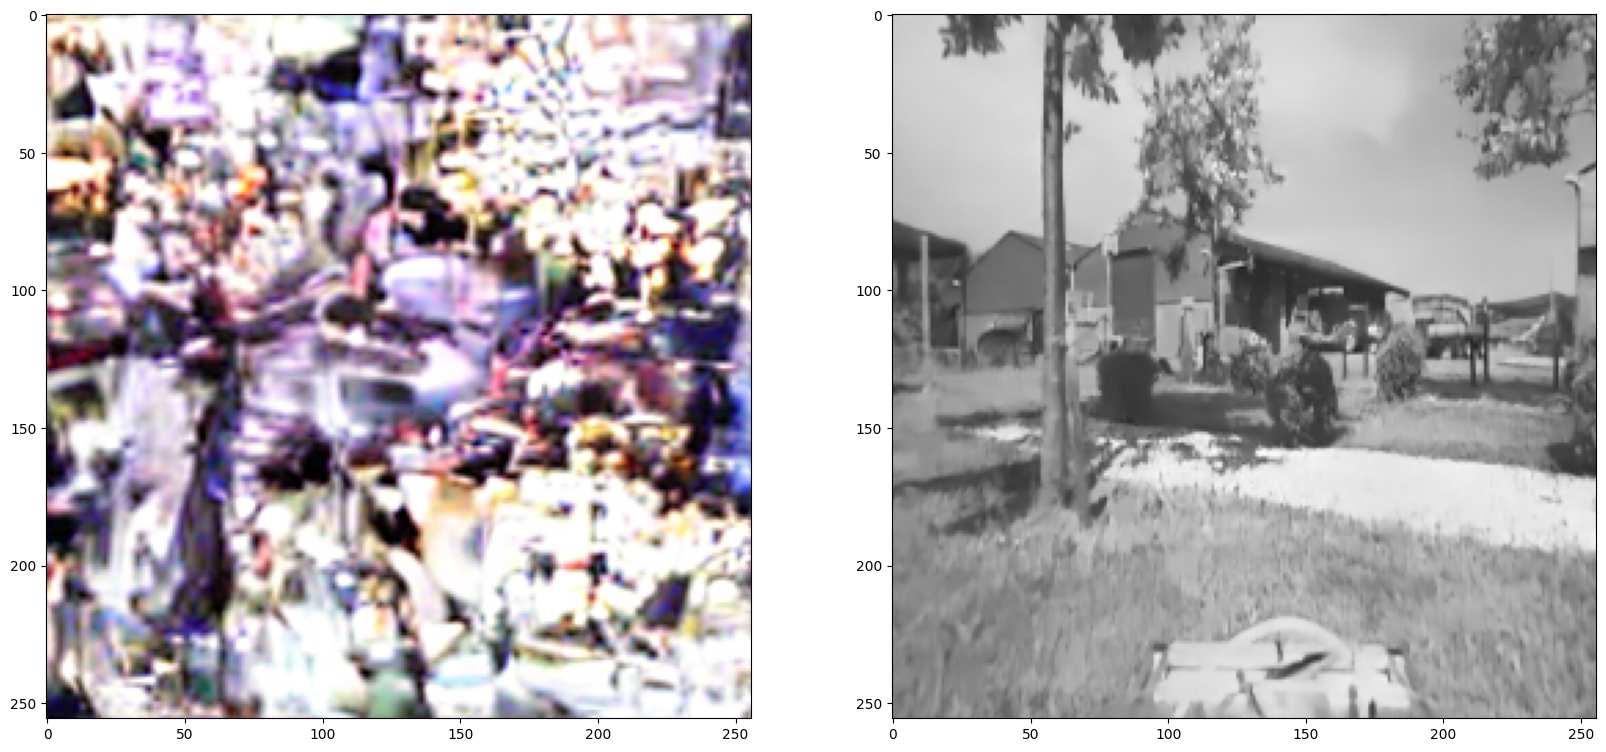

In [6]:
img1 = load_image('./images/uvc_camera_cam_0_f01240_undist_pred_shd.png')

image = pipe(
    "",
    num_inference_steps=40,
    generator=generator,
    image=img1,
).images[0]

#plot the image
import matplotlib.pyplot as plt
#draw the image and img1
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(img1)
plt.show()
